Initial point at x=-1, Minimum point found at ([2.22044605e-16], [4.93038066e-32])
Initial point at x=-1, Minimum point found at ([-33554431.99999999], [1.12589991e+15])
Initial point at x=-1, Minimum point found at ([-0.1], [0.01])
Initial point at x=-1, constraint value here is [-1.0299]
Positive directional derivative for linesearch
8
False
true that min val is less than upper bound
1


Text(0.5, 0.98, 'blue X is initial point, red o is solution')

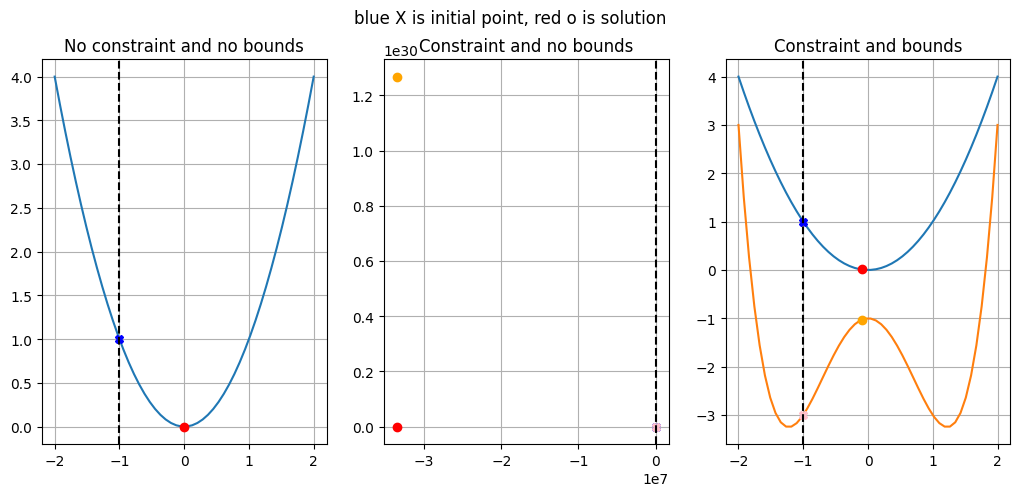

In [16]:
# trying the bounds.ipynb problem with scipy.optimize.minimize(method="SLSQP")
# no bounds to start with
import numpy as np
import scipy.optimize
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt

def f(x):
    return x**2

def c(x):
    return x**4 - (3 * x **2) - 1

x0 = -1
xs = np.linspace(-2, 2)

fig = make_subplots(rows=2, cols=2, subplot_titles=("Objective function f(x)", "Constraint function c(x)"))
fig.add_scatter(x=xs, y=f(xs), name='f(x)', row=1, col=1)
fig.add_scatter(x=xs, y=c(xs), name='c(x)', row=1, col=2)

fig.add_scatter(x=xs, y=f(xs), name='f(x)', row=2, col=1)
fig.add_scatter(x=xs, y=c(xs), name='c(x)', row=2, col=1)

fig.add_vline(x=x0, line_dash="dash")
fig.show()

# no constraint to start with
result = scipy.optimize.minimize(fun=f, x0=x0, method='SLSQP')
min_val = result.x
print(f"Initial point at x={x0}, Minimum point found at ({min_val}, {f(min_val)})")
print(result.message)
print(result.status)
print(result.success)

# add constraint c(x) now
cons=({'type': 'ineq', 'fun': c})
result_con = scipy.optimize.minimize(fun=f, x0=x0, method='SLSQP', constraints=cons)
min_val_con = result_con.x
print(f"Initial point at x={x0}, Minimum point found at ({min_val_con}, {f(min_val_con)})")
print(result_con.message)
print(result_con.status)
print(result_con.success)

# add bounds and constraint
bounds = [(-np.inf, -0.1)]
res_con_bds = scipy.optimize.minimize(fun=f, x0=x0, method='SLSQP', constraints=cons, bounds=bounds)
min_val_con_bound = res_con_bds.x
print(f"Initial point at x={x0}, Minimum point found at ({min_val_con_bound}, {f(min_val_con_bound)})")
print(f"Initial point at x={x0}, constraint value here is {c(min_val_con_bound)}")
print(res_con_bds.message)
print(res_con_bds.status)
print(res_con_bds.success)



if min_val_con_bound <= bounds[0][1]:
    print('true that min val is less than upper bound')

i=0
print(f(x0))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12.5,5))
axs = [ax1, ax2, ax3]
sols = [min_val, min_val_con, min_val_con_bound]
subplot_titles=["No constraint and no bounds", "Constraint and no bounds", "Constraint and bounds"]
for i in [0,1,2]:
    axs[i].plot(xs, f(xs))
    axs[i].plot(x0, f(x0), marker='X', color='blue')
    axs[i].plot(sols[i], f(sols[i]), marker='o', color='red')
    if i != 0:
        axs[i].plot(xs, c(xs))
        axs[i].plot(x0, c(x0), marker='X', color='pink')
        axs[i].plot(sols[i], c(sols[i]), marker='o', color='orange')
    axs[i].title.set_text(subplot_titles[i])
    axs[i].grid()
    axs[i].axvline(x=x0, color='black', linestyle='--')
    i=+1
fig.suptitle('blue X is initial point, red o is solution')

